## Installing the opencv library

In [1]:
#!pip install opencv-python

## Importing necessary libraries

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import random
import cv2
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### **MasterImage** class
##### For reading the images from the folders in the cassava dataset directory.
##### Each class is a folder in the directory.
##### All files in each folder is given the folder's name.
##### The label(s) are named after the folder.

##### There are 6 label(s):
    - bacteria blight
    - brown streak disease
    - green mite
    - mosaic disease
    - whitefly disease
    - healthy

In [3]:
class MasterImage(object):

    def __init__(self,PATH='', IMAGE_SIZE = 50):
        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE

        self.image_data = []
        self.x_data = []
        self.y_data = []
        self.CATEGORIES = []

        # This will get List of categories
        self.list_categories = []

    def get_categories(self):
        for path in os.listdir(self.PATH):
            if '.DS_Store' in path:
                pass
            else:
                self.list_categories.append(path)
        print("Found Categories ",self.list_categories,'\n')
        return self.list_categories

    def Process_Image(self):
        try:
            """
            Return Numpy array of image
            :return: X_Data, Y_Data
            """
            self.CATEGORIES = self.get_categories()
            for categories in self.CATEGORIES:                                                  # Iterate over categories

                train_folder_path = os.path.join(self.PATH, categories)                         # Folder Path
                class_index = self.CATEGORIES.index(categories)                                 # this will get index for classification

                for img in os.listdir(train_folder_path):                                       # This will iterate in the Folder
                    new_path = os.path.join(train_folder_path, img)                             # image Path

                    try:        # if any image is corrupted
                        image_data_temp = cv2.imread(new_path)                 # Read Image as numbers
                        image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE))
                        self.image_data.append([image_temp_resize,class_index])
                        random.shuffle(self.image_data)
                    except:
                        pass

            data = np.asanyarray(self.image_data)

            # Iterate over the Data
            for x in data:
                self.x_data.append(x[0])        # Get the X_Data
                self.y_data.append(x[1])        # get the label

            X_Data = np.asarray(self.x_data) / (255.0)      # Normalize Data
            Y_Data = np.asarray(self.y_data)

            # reshape x_Data

            X_Data = X_Data.reshape(-1, self.IMAGE_SIZE, self.IMAGE_SIZE, 3)

            return X_Data, Y_Data
        except:
            print("Failed to run Function Process Image ")

    def pickle_image(self):

        """
        :return: None Creates a Pickle Object of DataSet
        """
        # Call the Function and Get the Data
        X_Data,Y_Data = self.Process_Image()

        # Write the Entire Data into a Pickle File
        pickle_out = open('X_Data','wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        # Write the Y Label Data
        pickle_out = open('Y_Data', 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        print("Pickled Image Successfully ")
        return X_Data,Y_Data

    def load_dataset(self):

        try:
            # Read the Data from Pickle Object
            X_Temp = open('X_Data','rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open('Y_Data','rb')
            Y_Data = pickle.load(Y_Temp)

            print('Reading Dataset from PIckle Object')

            return X_Data,Y_Data

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')

            X_Data,Y_Data = self.pickle_image()
            return X_Data,Y_Data
class MasterImage2(object):

    def __init__(self,PATH='', IMAGE_SIZE = 50):
        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE

        self.image_data = []
        self.x_data = []
        self.y_data = []
        self.CATEGORIES = []

        # This will get List of categories
        self.list_categories = []

    def get_categories(self):
        for path in os.listdir(self.PATH):
            if '.DS_Store' in path:
                pass
            else:
                self.list_categories.append(path)
        print("Found Categories ",self.list_categories,'\n')
        return self.list_categories

    def Process_Image(self):
        try:
            """
            Return Numpy array of image
            :return: X_Data, Y_Data
            """
            self.CATEGORIES = self.get_categories()
            for categories in self.CATEGORIES:                                                  # Iterate over categories

                train_folder_path = os.path.join(self.PATH, categories)                         # Folder Path
                class_index = self.CATEGORIES.index(categories)                                 # this will get index for classification

                for img in os.listdir(train_folder_path):                                       # This will iterate in the Folder
                    new_path = os.path.join(train_folder_path, img)                             # image Path

                    try:        # if any image is corrupted
                        image_data_temp = cv2.imread(new_path)                 # Read Image as numbers
                        image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE))
                        self.image_data.append([image_temp_resize,class_index])
                        random.shuffle(self.image_data)
                    except:
                        pass

            data = np.asanyarray(self.image_data)

            # Iterate over the Data
            for x in data:
                self.x_data.append(x[0])        # Get the X_Data
                self.y_data.append(x[1])        # get the label

            X_Data = np.asarray(self.x_data) / (255.0)      # Normalize Data
            Y_Data = np.asarray(self.y_data)

            # reshape x_Data

            X_Data = X_Data.reshape(-1, self.IMAGE_SIZE, self.IMAGE_SIZE, 3)

            return X_Data, Y_Data
        except:
            print("Failed to run Function Process Image ")

    def pickle_image(self):

        """
        :return: None Creates a Pickle Object of DataSet
        """
        # Call the Function and Get the Data
        X_Data,Y_Data = self.Process_Image()

        # Write the Entire Data into a Pickle File
        pickle_out = open('X1_Data','wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        # Write the Y Label Data
        pickle_out = open('Y1_Data', 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        print("Pickled Image Successfully ")
        return X_Data,Y_Data

    def load_dataset(self):

        try:
            # Read the Data from Pickle Object
            X_Temp = open('X1_Data','rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open('Y1_Data','rb')
            Y_Data = pickle.load(Y_Temp)

            print('Reading Dataset from PIckle Object')

            return X_Data,Y_Data

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')

            X_Data,Y_Data = self.pickle_image()
            return X_Data,Y_Data

### Reading the image from the image folder

In [4]:
cassava_train = MasterImage(PATH='images')

### Loading the image folders into images and labels

In [5]:
(train_images, train_label) = cassava_train.load_dataset()

Reading Dataset from PIckle Object


#### The shape of the data

In [6]:
train_images.shape

(6655, 50, 50, 3)

In [7]:
print(len(train_label[train_label == 0]))
print(len(train_label[train_label == 1]))
print(len(train_label[train_label == 2]))
print(len(train_label[train_label == 3]))
print(len(train_label[train_label == 4]))

466
1443
772
2658
1000


##### Image categories

In [8]:
# Cassava categories
cassava_train.get_categories()

Found Categories  ['cassava bacteria blight', 'cassava brown streak virus', 'cassava green mite', 'cassava mosaic disease', 'cassava whitefly disease', 'healthy'] 



['cassava bacteria blight',
 'cassava brown streak virus',
 'cassava green mite',
 'cassava mosaic disease',
 'cassava whitefly disease',
 'healthy']

#### Splitting the image dataset into training and testing data

In [9]:
(train_images ,test_images, train_labels, test_labels) = train_test_split(train_images, train_label, test_size=0.2, random_state=23)

In [10]:
print(len(train_images))
print(len(test_images))

5324
1331


##### Normalizing the image array by dividing by 255

In [11]:
# Normalization
x_train = train_images/255.0
x_test = test_images/255.0

##### Reshaping the image arrays as machine learning can only work with 2D data..

In [12]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array

# train images reshaping
nsamples, nx, ny, nrgb = x_train.shape
x_train_2 = x_train.reshape((5324,50*50*3))

# test images reshaping
nsamples, nx, ny, nrgb = x_train.shape
x_test_2 = x_test.reshape((1331,50*50*3))

#### New shape 

In [13]:
# checking to see the new dimension
x_test_2.shape

(1331, 7500)

##### Sample image

3

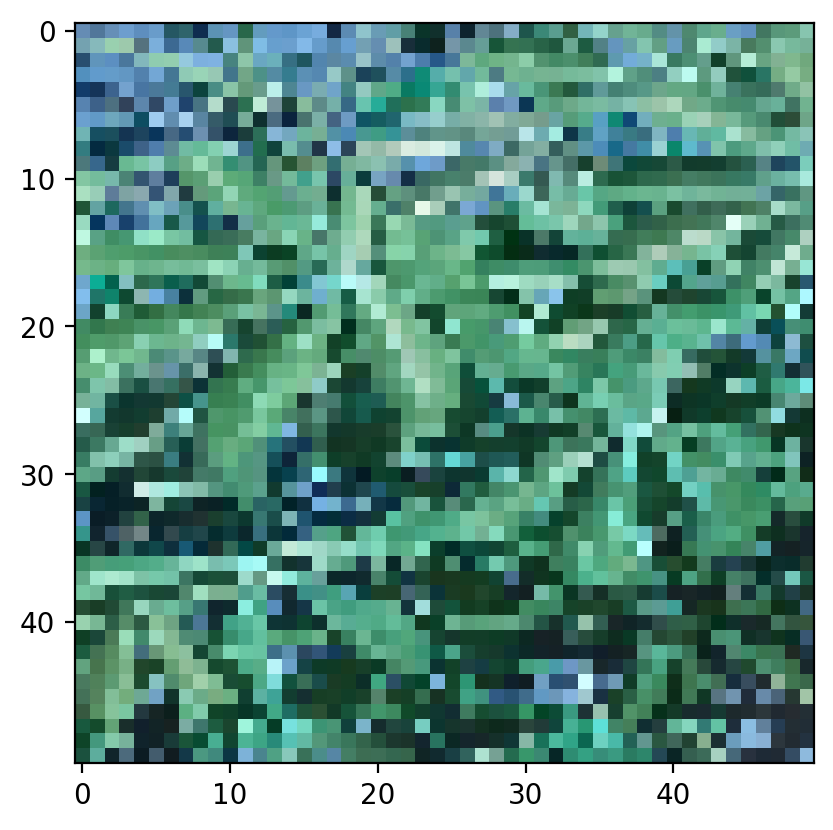

In [14]:
plt.imshow(x_train[0]*255)
train_label[0]

## BUILDING THE MODEL

## **Algorithms to be used**:

####    - RANDOM FOREST
            Random forest is a commonly-used machine learning algorithm which combines the output of multiple decision trees
            to reach a single result.

####    - NAIVE BAYES
            It is the most fundamental machine learning classifier, also abbreviated as NB. 
            It works based on Bayes Theorem and has independent features.
####    - K-NEAREST NEIGHBOR 
            KNN stands for K-Nearest neighbours. It is also an algorithm popularly used for multi-class classification.
            It is implemented in sklearn using KNeighborsClassifier class.

### NB

#### {0:'cassava bacteria blight',
#### 1:'cassava brown streak virus',
#### 2:'cassava green mite',
#### 3:'cassava mosaic disease',
#### 4:'cassava whitefly disease',
#### 5:'healthy'})

## RANDOM FOREST CLASSIFIER

In [15]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

In [16]:
model_rf.fit(x_train_2,train_labels)

RandomForestClassifier()

In [17]:
y_pred_rf = model_rf.predict(x_test_2)
y_pred_rf

array([3, 3, 3, ..., 3, 3, 3])

In [18]:
print("accuracy:\n  {}".format(accuracy_score(y_pred_rf,test_labels)))
print("\n")
print("classification report:\n {}".format(classification_report(y_pred_rf,test_labels)))

accuracy:
  0.492862509391435


classification report:
               precision    recall  f1-score   support

           0       0.06      0.50      0.11        12
           1       0.23      0.54      0.32       121
           2       0.00      0.00      0.00         4
           3       0.92      0.47      0.62      1047
           4       0.50      0.65      0.57       147
           5       0.00      0.00      0.00         0

    accuracy                           0.49      1331
   macro avg       0.29      0.36      0.27      1331
weighted avg       0.80      0.49      0.58      1331



c:\Users\oyeni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\oyeni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\oyeni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


confusion matrix: 
[[  6   6   0   0   0   0]
 [ 25  65  11  11   1   8]
 [  2   1   0   1   0   0]
 [ 57 204 157 490  93  46]
 [  3  10   8  30  95   1]
 [  0   0   0   0   0   0]]


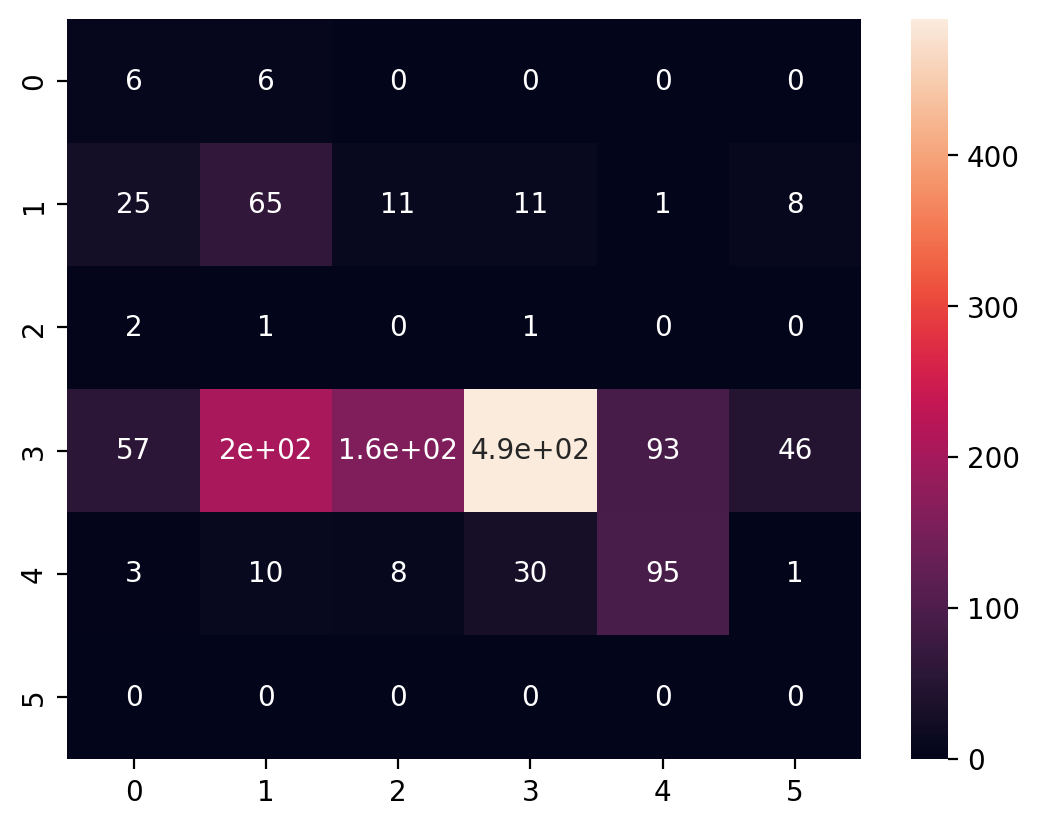

In [19]:
print("confusion matrix: ")
print(confusion_matrix(y_pred_rf,test_labels))
cm = confusion_matrix(y_pred_rf,test_labels)
sns.heatmap(cm,annot=True)
plt.show()

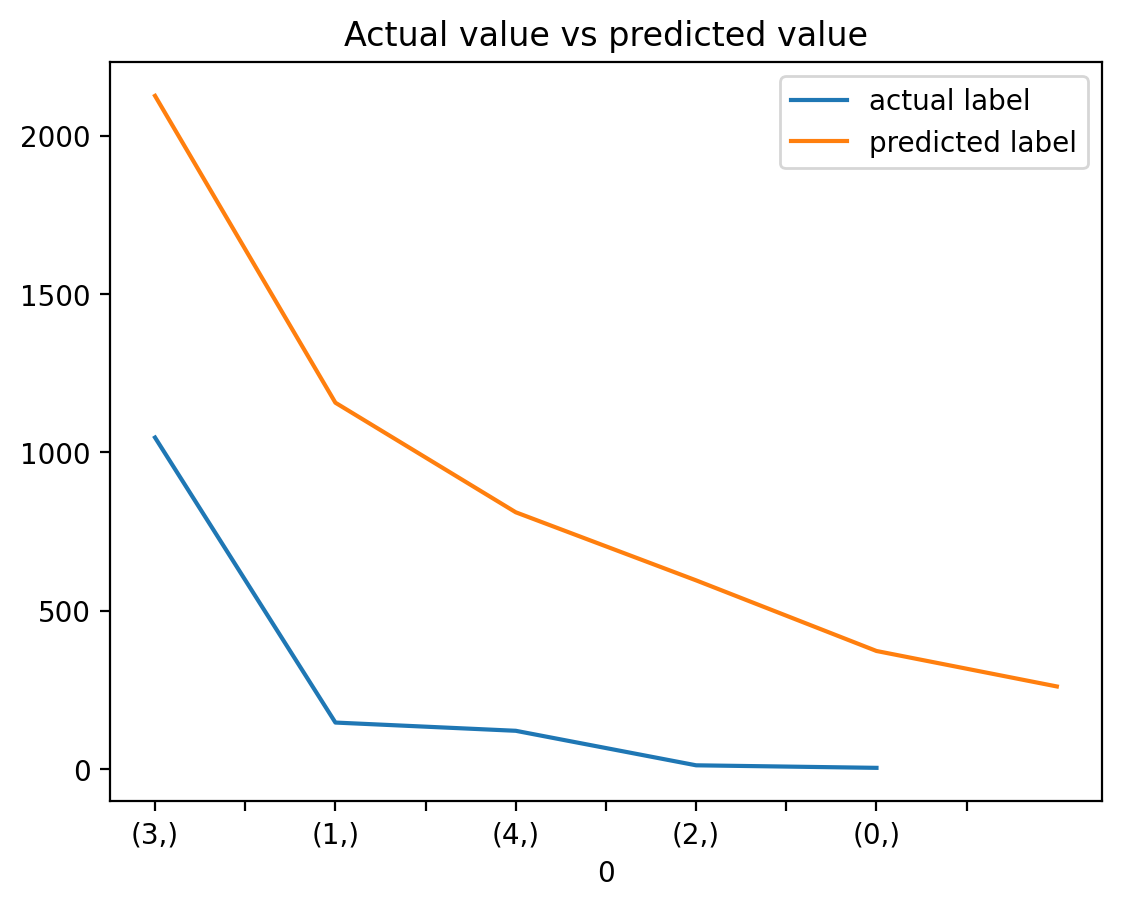

In [20]:
y_pred_rf = pd.DataFrame(y_pred_rf)
y_pred_rf.value_counts().plot(label='actual label')
pd.DataFrame(train_labels).value_counts().plot(label='predicted label', title = 'Actual value vs predicted value')
plt.legend()
plt.savefig('knn_comparison.jpg')

## NAIVE BAYES

In [21]:
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()

In [22]:
model_nb.fit(x_train_2,train_labels)

GaussianNB()

In [23]:
y_pred_nb = model_nb.predict(x_test_2)
y_pred_nb

array([5, 3, 4, ..., 5, 4, 4])

In [24]:
print("accuracy:\n  {}".format(accuracy_score(y_pred_nb,test_labels)))
print("\n")
print("classification report:\n {}".format(classification_report(y_pred_nb,test_labels)))

accuracy:
  0.33283245679939893


classification report:
               precision    recall  f1-score   support

           0       0.38      0.16      0.22       224
           1       0.13      0.35      0.19       109
           2       0.15      0.21      0.18       130
           3       0.31      0.60      0.41       277
           4       0.85      0.38      0.52       425
           5       0.29      0.10      0.14       166

    accuracy                           0.33      1331
   macro avg       0.35      0.30      0.28      1331
weighted avg       0.46      0.33      0.34      1331



confusion matrix: 
[[ 35  74  27  80   1   7]
 [  8  38   8  44   3   8]
 [  9  32  27  53   8   1]
 [ 10  36  43 167  10  11]
 [ 20  58  41 134 160  12]
 [ 11  48  30  54   7  16]]


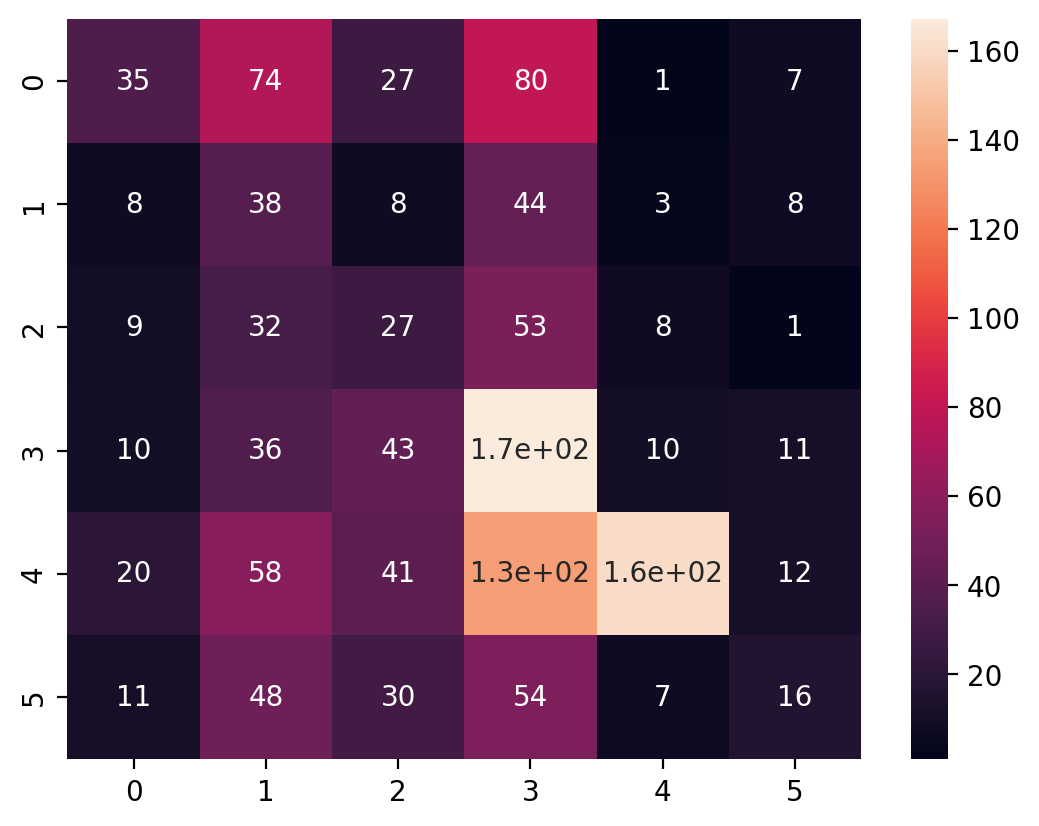

In [25]:
print("confusion matrix: ")
cm = confusion_matrix(y_pred_nb,test_labels)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

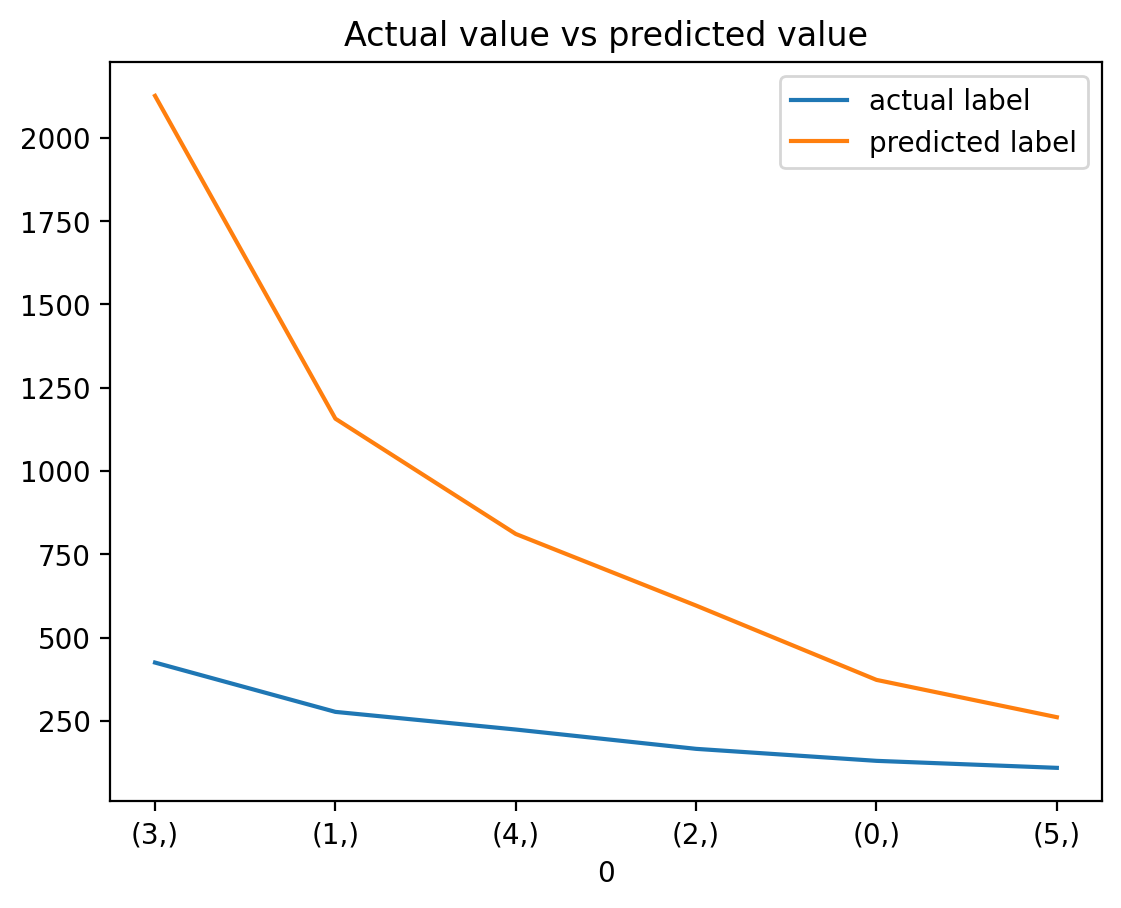

In [26]:
y_pred_nb = pd.DataFrame(y_pred_nb)
y_pred_nb.value_counts().plot(label='actual label')
pd.DataFrame(train_labels).value_counts().plot(label='predicted label', title = 'Actual value vs predicted value')
plt.legend()
plt.savefig('knn_comparison.jpg')

## K NEAREST NEIGHBOR(KNN)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=7)

In [28]:
model_knn.fit(x_train_2,train_labels)

KNeighborsClassifier(n_neighbors=7)

In [29]:
y_pred_knn = model_knn.predict(x_test_2)
y_pred_knn

c:\Users\oyeni\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 1, ..., 0, 3, 3])

In [30]:
print("accuracy:\n  {}".format(accuracy_score(y_pred_knn,test_labels)))
print("\n")
print("classification report:\n {}".format(classification_report(y_pred_knn,test_labels)))

accuracy:
  0.25244177310293014


classification report:
               precision    recall  f1-score   support

           0       0.26      0.15      0.19       157
           1       0.66      0.21      0.32       875
           2       0.12      0.22      0.16       102
           3       0.12      0.43      0.19       151
           4       0.20      0.88      0.32        42
           5       0.00      0.00      0.00         4

    accuracy                           0.25      1331
   macro avg       0.23      0.32      0.20      1331
weighted avg       0.49      0.25      0.28      1331



confusion matrix: 
[[ 35  74  27  80   1   7]
 [  8  38   8  44   3   8]
 [  9  32  27  53   8   1]
 [ 10  36  43 167  10  11]
 [ 20  58  41 134 160  12]
 [ 11  48  30  54   7  16]]


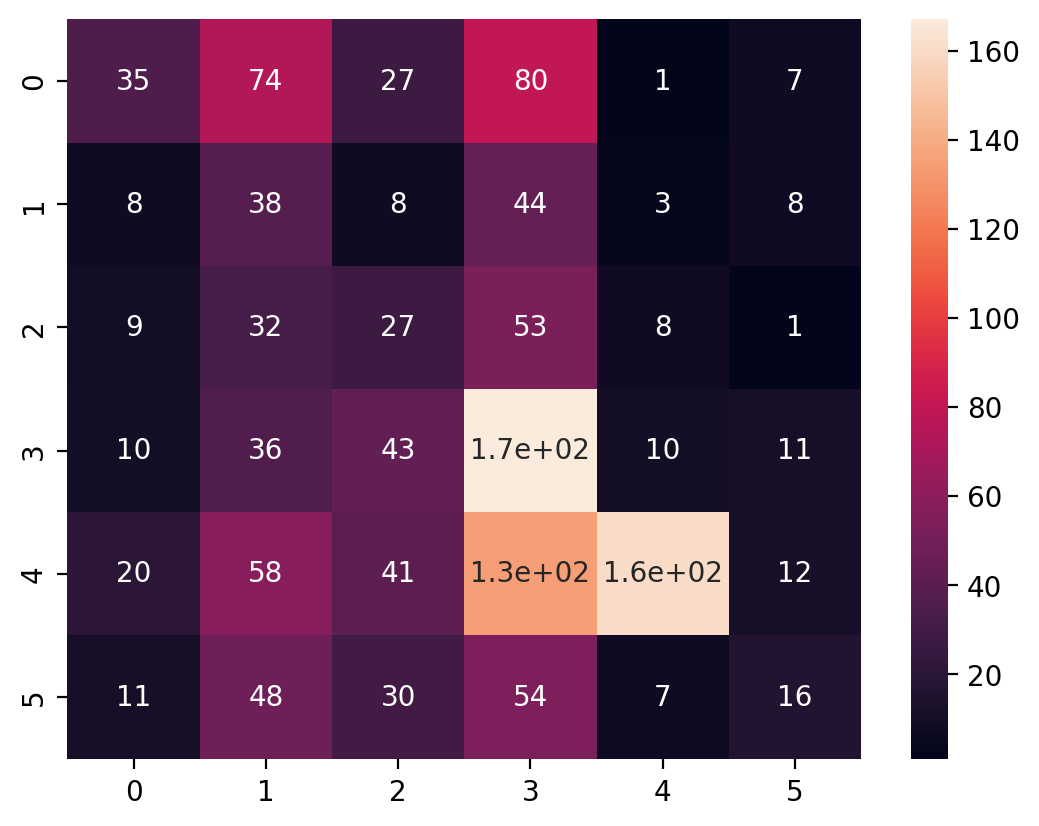

In [31]:
print("confusion matrix: ")
confusion_matrix(y_pred_knn,test_labels)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

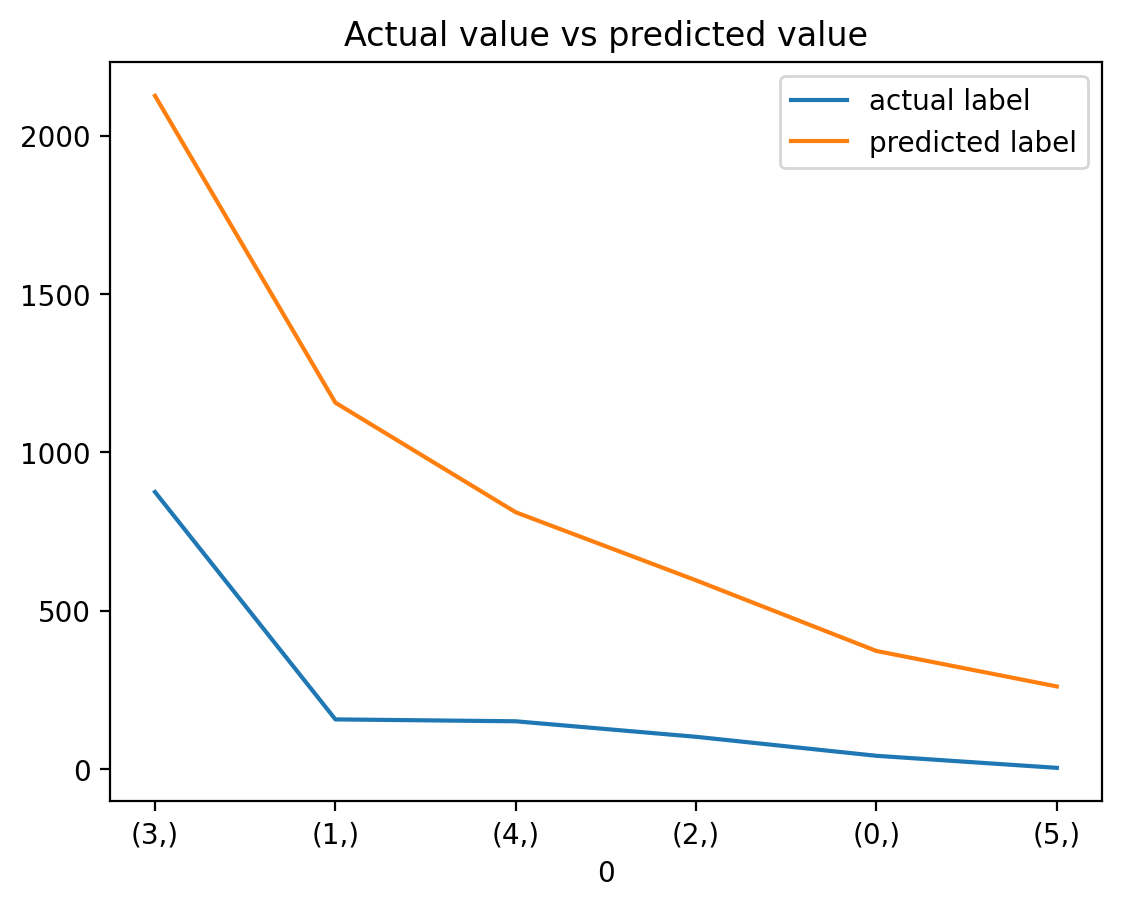

In [32]:
y_pred_knn = pd.DataFrame(y_pred_knn)
y_pred_knn.value_counts().plot(label='actual label')
pd.DataFrame(train_labels).value_counts().plot(label='predicted label', title = 'Actual value vs predicted value')
plt.legend()
plt.savefig('knn_comparison.jpg')

## **FINDING** AND **COMPARING** THE THREE ALGORITHMS:
####      - **GridSearchCv**
####    - Plotting graph using **Seaborn**

#### Using **GRID SEARCH CV** and **SHUFFLESPLIT** to find the best model and showing as a DataFrame

In [33]:
# Finding the best model score by using Grid search cv an shuffle split
# Defining the find_best_model function and passing in the dictionary containing the parameters to change.

# import necessary libraries
from sklearn.model_selection import ShuffleSplit, GridSearchCV

# defining the function
# def find_best_model(x,y):
#         algos = {
#             'Random Forest':{
#             'model': RandomForestClassifier(),
#             'params': {
#             'criterion':['gini','entropy'],
#             'n_estimators':[20,50],
#             'max_features':['auto','sqrt'],
#             'class_weight':['balanced','balanced_subsample']
#                 }
#             },
#             'K Nearest Neighbor':{
#                   'model':KNeighborsClassifier(),
#                   'params':{
#                   'n_neighbors':[5, 10],
#                   'algorithm':['auto', 'kd_tree']
#                 }

#             },
#             'Gaussian Naive Bayes':{
#                   'model':GaussianNB(),
#                   'params': {'var_smoothing': np.logspace(0,-9, num=2)}
#             }
#         }
#         scores = []
#         cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
#         for algo_name,config in algos.items():
#             gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
#             gs.fit(x,y)
#             scores.append({
#                 'model':algo_name,
#                 'best_score':gs.best_score_,
#                 'best_params':gs.best_params_
#             })
#         return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [34]:
# calling the function on our train images and train labels
# find_best_model(x_train_2, train_labels)

#### The Support Vector Machine SVM

In [35]:
from sklearn.svm import SVC
model_svc = SVC()

model_svc.fit(x_train_2,train_labels)

SVC()

In [36]:
y_pred_svc = model_svc.predict(x_test_2)
y_pred_svc

array([3, 3, 3, ..., 1, 4, 3])

In [37]:
print("accuracy:\n  {}".format(accuracy_score(y_pred_svc,test_labels)))
print("\n")
print("classification report:\n {}".format(classification_report(y_pred_svc,test_labels)))

accuracy:
  0.5477084898572502


classification report:
               precision    recall  f1-score   support

           0       0.04      0.67      0.08         6
           1       0.37      0.52      0.43       203
           2       0.00      0.00      0.00         2
           3       0.90      0.51      0.65       942
           4       0.74      0.79      0.76       178
           5       0.00      0.00      0.00         0

    accuracy                           0.55      1331
   macro avg       0.34      0.41      0.32      1331
weighted avg       0.79      0.55      0.63      1331



c:\Users\oyeni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\oyeni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\oyeni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


confusion matrix: 
[[ 35  74  27  80   1   7]
 [  8  38   8  44   3   8]
 [  9  32  27  53   8   1]
 [ 10  36  43 167  10  11]
 [ 20  58  41 134 160  12]
 [ 11  48  30  54   7  16]]


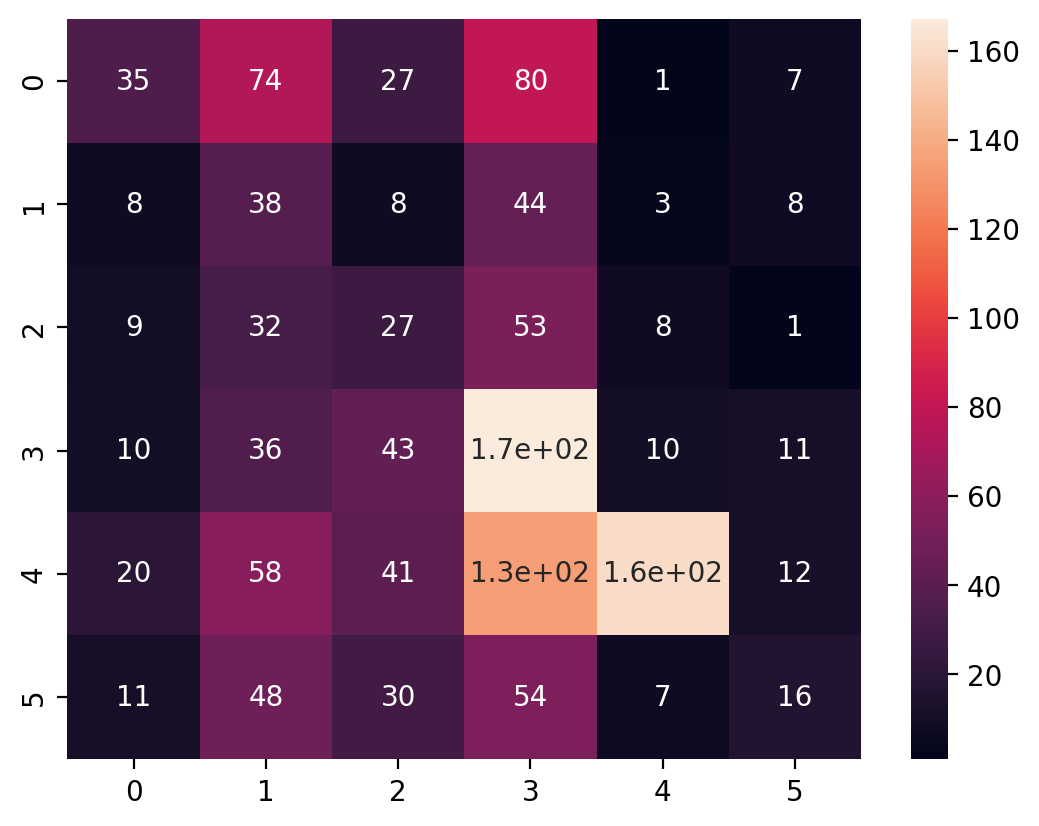

In [38]:
print("confusion matrix: ")
confusion_matrix(y_pred_svc,test_labels)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

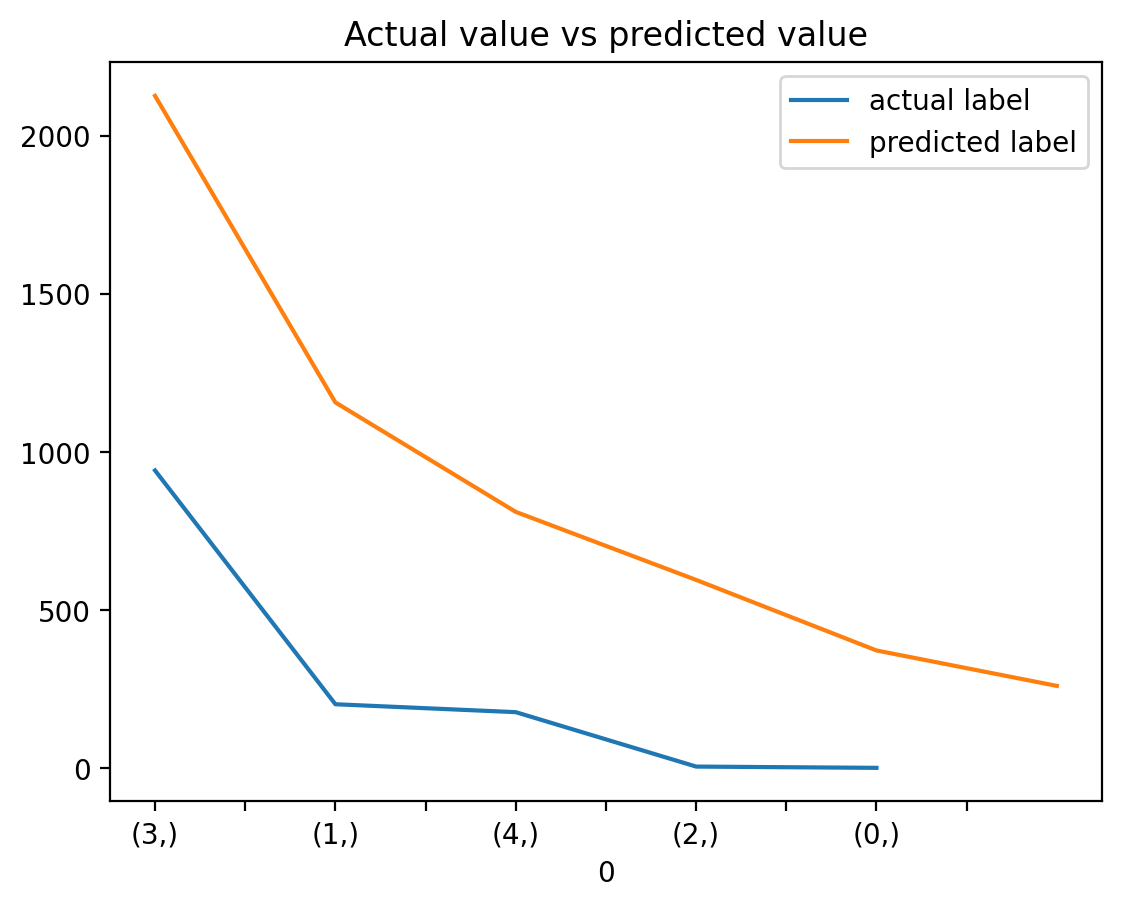

In [39]:
y_pred_xgb = pd.DataFrame(y_pred_svc)
y_pred_xgb.value_counts().plot(label='actual label')
pd.DataFrame(train_labels).value_counts().plot(label='predicted label', title = 'Actual value vs predicted value')
plt.legend()
plt.savefig('svc_comparison.jpg')

### The Xtreme Gradient Boosting algorithm

In [40]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier()

model_xgb.fit(x_train_2,train_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [41]:
y_pred_xgb = model_xgb.predict(x_test_2)
y_pred_xgb

array([3, 3, 3, ..., 1, 4, 3], dtype=int64)

In [42]:
print("accuracy:\n  {}".format(accuracy_score(y_pred_xgb,test_labels)))
print("\n")
print("classification report:\n {}".format(classification_report(y_pred_xgb,test_labels)))

accuracy:
  0.5574755822689706


classification report:
               precision    recall  f1-score   support

           0       0.08      0.58      0.13        12
           1       0.42      0.55      0.48       220
           2       0.02      0.19      0.04        21
           3       0.89      0.52      0.66       906
           4       0.74      0.81      0.77       171
           5       0.00      0.00      0.00         1

    accuracy                           0.56      1331
   macro avg       0.36      0.44      0.35      1331
weighted avg       0.77      0.56      0.63      1331



confusion matrix: 
[[ 35  74  27  80   1   7]
 [  8  38   8  44   3   8]
 [  9  32  27  53   8   1]
 [ 10  36  43 167  10  11]
 [ 20  58  41 134 160  12]
 [ 11  48  30  54   7  16]]


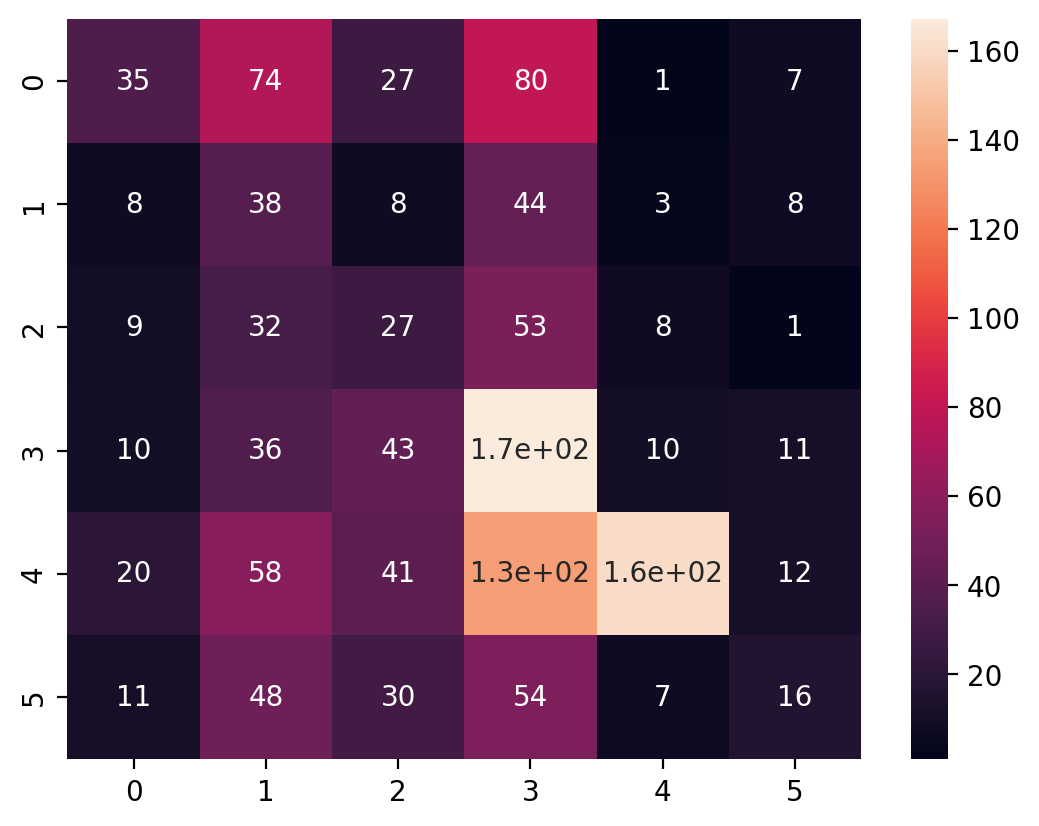

In [43]:
print("confusion matrix: ")
confusion_matrix(y_pred_xgb,test_labels)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

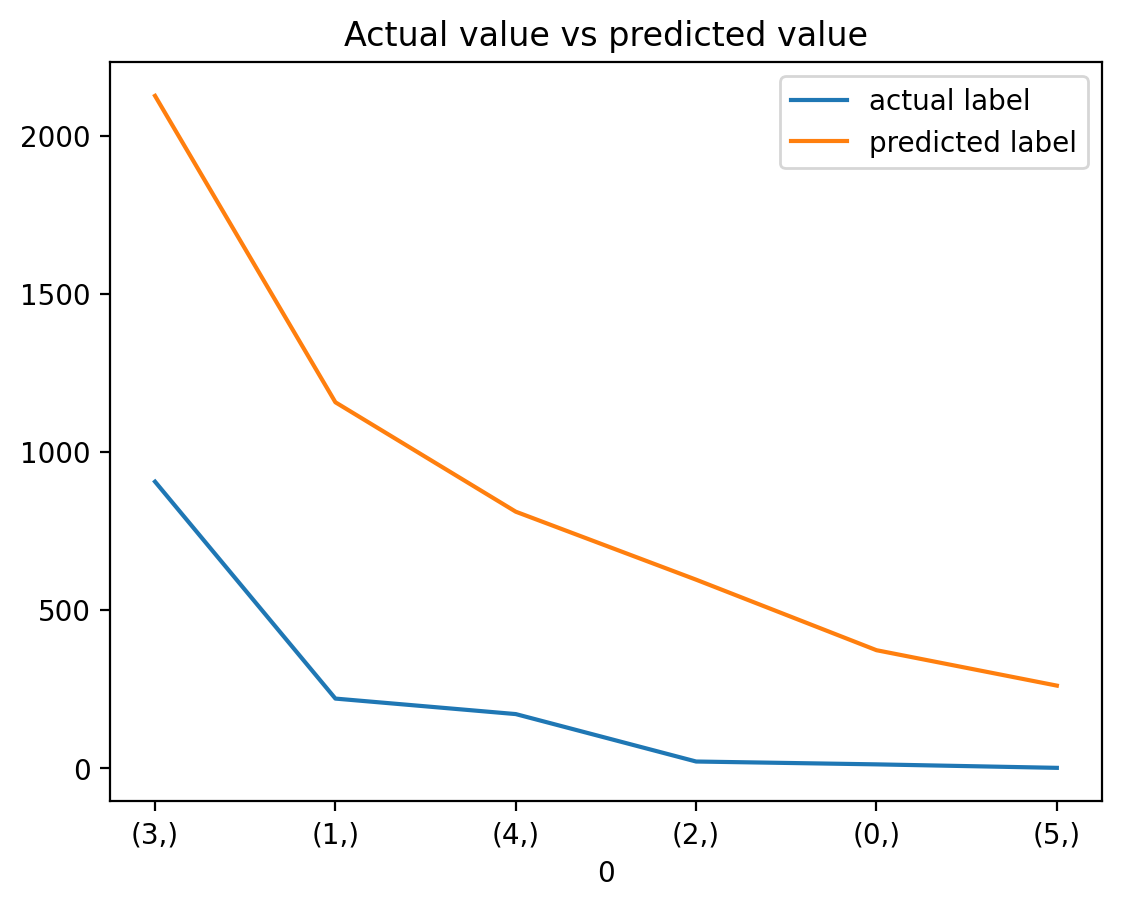

In [44]:
y_pred_xgb = pd.DataFrame(y_pred_xgb)
y_pred_xgb.value_counts().plot(label='actual label')
pd.DataFrame(train_labels).value_counts().plot(label='predicted label', title = 'Actual value vs predicted value')
plt.legend()
plt.savefig('xgb_comparison.jpg')

In [45]:
acc_dict = {
        "Random Forest":accuracy_score(y_pred_rf,test_labels)*100,
        "naive_bayes":accuracy_score(y_pred_nb,test_labels)*100,
        "knn":accuracy_score(y_pred_knn,test_labels)*100,
        "svc":accuracy_score(y_pred_svc,test_labels)*100,
        "xgb":accuracy_score(y_pred_xgb,test_labels)*100
        }

<AxesSubplot:>

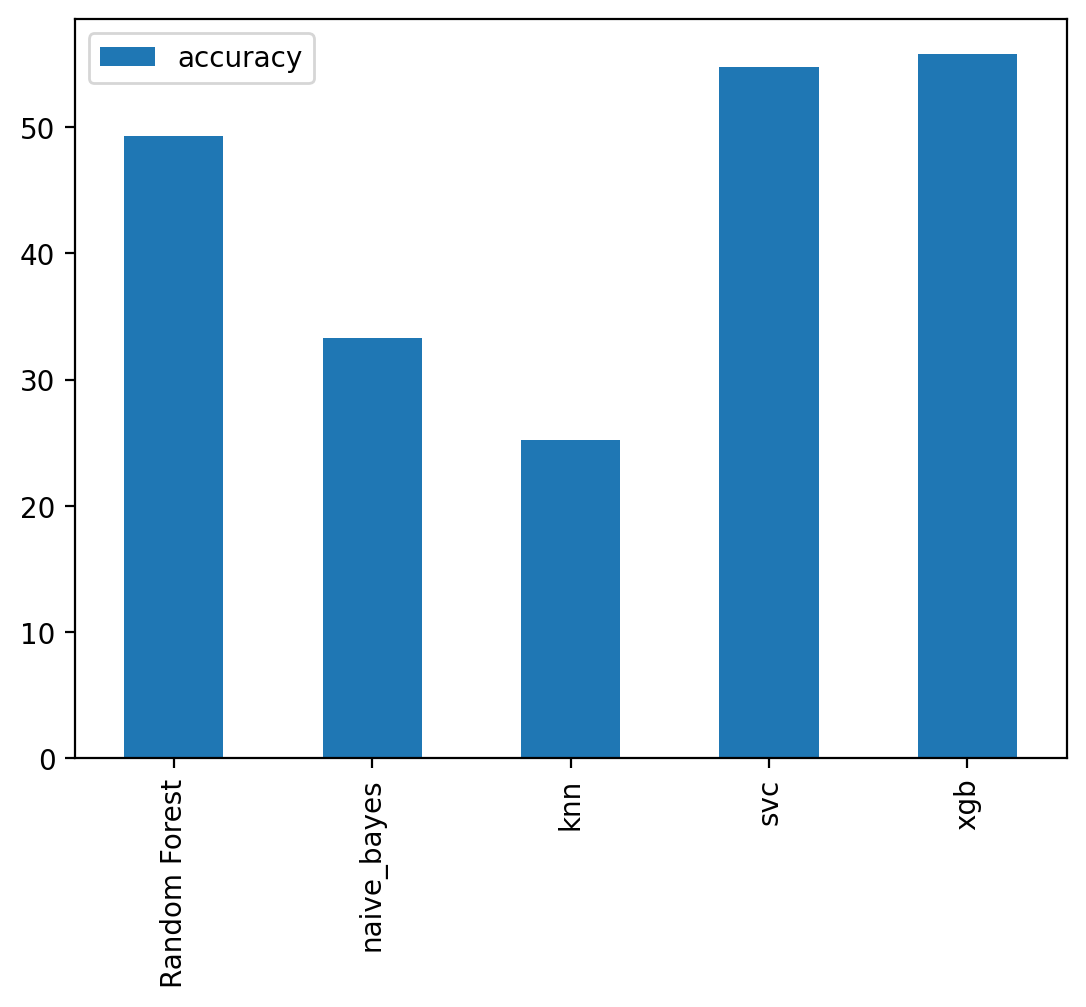

In [46]:
pd.DataFrame(acc_dict.values(), index=acc_dict.keys(), columns=["accuracy"]).plot(kind='bar')

In [47]:
# from sklearn.preprocessing import LabelBinarizer
# from sklearn.metrics import roc_curve, auc
# from sklearn.metrics import RocCurveDisplay

# label_binarizer = LabelBinarizer().fit(train_labels)
# y_onehot_test = label_binarizer.transform(y_pred_xgb)
# y_onehot_test.shape  # (n_samples, n_classes)

In [48]:
# from itertools import combinations

# pair_list = list(combinations(np.unique(cassava_train.get_categories()), 2))
# print(pair_list)

In [49]:
# y_score_xgb = model_xgb.fit(x_train_2,train_labels).predict_proba(x_test_2)

# y_score_xgb

In [50]:
# from sklearn.metrics import auc, roc_curve

# # store the fpr, tpr, and roc_auc for all averaging strategies
# fpr, tpr, roc_auc = dict(), dict(), dict()
# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score_xgb.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

In [51]:
# n_classes = 6
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score_xgb[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# fpr_grid = np.linspace(0.0, 1.0, 1000)

# # Interpolate all ROC curves at these points
# mean_tpr = np.zeros_like(fpr_grid)

# for i in range(n_classes):
#     mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# # Average it and compute AUC
# mean_tpr /= n_classes

# fpr["macro"] = fpr_grid
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")